In [25]:
# Importing the libraries

import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
df = pd.read_csv("yellow_tripdata_2017-01.csv") # Reading the csv file
print(df.shape) # Defining number of rows and features
df.describe()

(9710124, 17)


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06
mean,1.547079e+00,1.628982e+00,2.813899e+00,1.039581e+00,1.641065e+02,1.617627e+02,1.337541e+00,1.237423e+01,3.234861e-01,4.975229e-01,1.751269e+00,2.764163e-01,2.996799e-01,1.552673e+01
std,4.977787e-01,1.271994e+00,3.611680e+00,5.059084e-01,6.664998e+01,7.067207e+01,4.913703e-01,2.652315e+02,4.425577e-01,4.881278e-02,2.571253e+00,1.638840e+00,1.341976e-02,2.653479e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.500000e+02,-5.520000e+01,-5.000000e-01,-4.100000e+01,-1.500000e+01,-3.000000e-01,-3.503000e+02
25%,1.000000e+00,1.000000e+00,9.500000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.300000e+00,0.000000e+00,3.000000e-01,1.130000e+01
75%,2.000000e+00,2.000000e+00,2.900000e+00,1.000000e+00,2.330000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.260000e+00,0.000000e+00,3.000000e-01,1.675000e+01
max,2.000000e+00,9.000000e+00,2.647100e+02,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,6.259008e+05,5.554000e+01,5.650000e+01,9.999900e+02,9.110800e+02,3.000000e-01,6.259016e+05


In [27]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.0,0.3,15.30
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.0,0.5,1.45,0.0,0.3,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.0,0.5,1.00,0.0,0.3,7.30
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80


In [28]:
df.drop('extra', axis = 1, inplace = True)

In [29]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.5,2.00,0.0,0.3,15.30
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.5,1.45,0.0,0.3,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.5,1.00,0.0,0.3,7.30
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.5,1.70,0.0,0.3,8.50
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.5,0.00,0.0,0.3,52.80


In [30]:
df.drop('tolls_amount', axis = 1, inplace = True)

In [31]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,improvement_surcharge,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.5,2.00,0.3,15.30
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.5,1.45,0.3,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.5,1.00,0.3,7.30
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.5,1.70,0.3,8.50
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.5,0.00,0.3,52.80


In [32]:
df.drop('store_and_fwd_flag', axis = 1, inplace = True)

In [33]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,improvement_surcharge,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,263,161,1,12.5,0.5,2.00,0.3,15.30
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,186,234,1,5.0,0.5,1.45,0.3,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,164,161,1,5.5,0.5,1.00,0.3,7.30
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,236,75,1,6.0,0.5,1.70,0.3,8.50
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,249,234,2,52.0,0.5,0.00,0.3,52.80


In [34]:
#target_column = ['total_amount'] 
#df.columns = ["passenger_count","trip_distance","RatecodeID","PULocationID","DOLocationID","payment_type","fare_amount","mta_tax","tip_amount","improvement_surcharge"]
#predictors = list(set(list(df.columns))-set(target_column))
#df[predictors] = df[predictors]/df[predictors].max()
#df.describe()

In [35]:
# Training, Testing and Splitting of Data
predictors = ["passenger_count","trip_distance","RatecodeID","PULocationID","DOLocationID","payment_type","fare_amount","mta_tax","tip_amount","improvement_surcharge"]
target_column = ["total_amount"]
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(y_test.shape)

(6797086, 10)
(2913038, 1)


In [36]:
def scatter_plot(predictors,target_column):
    plt.figure(figsize = (16,8))
    plt.scatter(
        df[predictors],
        df[target_column],
        c = 'black'
    )
    plt.xlabel("Information Related to the Pickup and Dropoff".format(predictors))
    plt.ylabel("total_amount")
    plt.show()

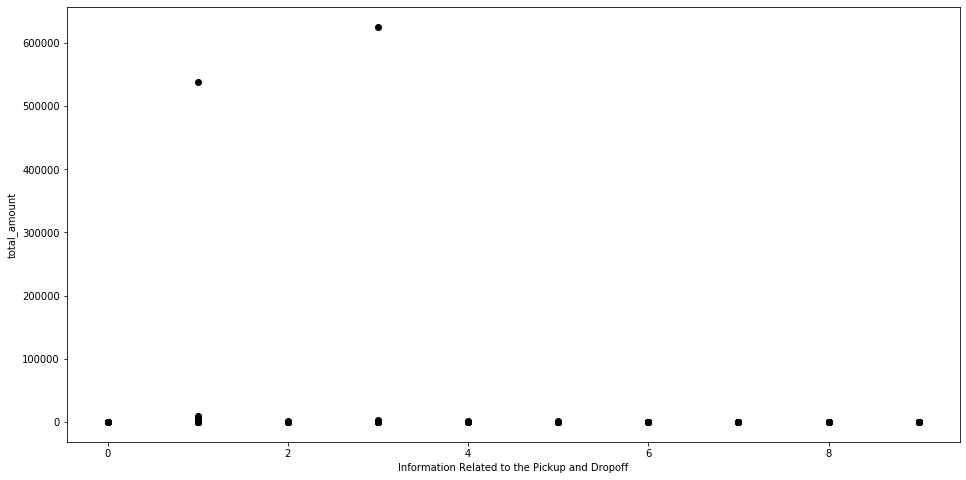

In [37]:
scatter_plot('passenger_count','total_amount') # On X-Axis is passenger_count with respect to total_amount on Y-axis 

In [ ]:
scatter_plot('trip_distance','total_amount')# On X-Axis is trip_distance with respect to total_amount on Y-axis 

In [ ]:
scatter_plot('RatecodeID','total_amount')# On X- Axis is RatecodeID with respect to total_amount on Y-axis 

In [ ]:
scatter_plot('fare_amount','total_amount')# On X- Axis is fare_amount with respect to total_amount on Y-axis 

In [ ]:
scatter_plot('DOLocationID','total_amount') # On X-Axis is DOLocationID with respect to total_amount on Y-axis 

In [ ]:
scatter_plot('payment_type','total_amount') # On X-Axis is payment_type with respect to total_amount on Y-axis 

In [ ]:
scatter_plot('fare_amount','total_amount') # On X-Axis is fare_amount with respect to total_amount on Y-axis 

In [ ]:
scatter_plot('mta_tax','total_amount') # On X-Axis is mta_tax with respect to total_amount on Y-axis 

In [ ]:
scatter_plot('tip_amount','total_amount') # On X-Axis is trip_amount with respect to total_amount on Y-axis 

In [ ]:
scatter_plot('improvement_surcharge','total_amount') # On X-Axis is improvement_surcharge with respect to total_amount on Y-axis 

In [ ]:
sns.set()
sns.relplot(X, y, 
            hue="smoker", style="smoker", size="size",
            data=tips);

# Ridge Regression

In [ ]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print("RMSE: ",np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print("R-Squared: ",r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

#### The above output shows that the RMSE and R-squared values for the Ridge Regression model on the training data is 1.48 and 99.99 percent, respectively. For the test data, the result for these metrics is 1.39 and 99 percent, respectively.

# Lasso Regression

In [ ]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print("RMSE: ",np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("R-Squared: ",r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

#### The above output shows that the RMSE and R-squared values for the Lasso Regression model on the training data is 1.49 and 99.99 percent, respectively.The results for these metrics on the test data is 1.4 and 99 percent, respectively.